# Bus-Stop

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("features_embedded.csv")

df['norm_road']=df[['Signal', 'bus_stop', 'Turn','Congestion']].apply(lambda e: 1 if e[0]==e[1]==e[2]==e[3]==0 else 0,axis=1)

In [3]:
labels=df[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
features=df.drop(columns=['norm_road','Signal', 'bus_stop', 'Turn','Congestion'])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [6]:
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [7]:
#[X_test.time_level_1==1]

# Modelling

In [8]:
import tensorflow as tf

In [9]:
#<pre>
dataset=tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(1000).repeat(-1).batch(32)
next_batch=dataset.make_one_shot_iterator().get_next()
#</pre>

W0331 20:45:32.497479 139919312791360 deprecation.py:323] From <ipython-input-9-fdff314025ee>:3: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [10]:
def Neural_Net(X,hidden,dropout,mode):
    
    net=tf.contrib.layers.fully_connected(X,hidden,tf.nn.relu)
    #net=tf.contrib.layers.dropout(net,keep_prob=1-dropout,is_training=mode)
    #net=tf.contrib.layers.batch_norm(net,is_training=mode)
    
    net=tf.contrib.layers.fully_connected(net,hidden,tf.nn.relu)
    #net=tf.contrib.layers.dropout(net,keep_prob=1-dropout,is_training=mode)
    #net=tf.contrib.layers.batch_norm(net,is_training=mode)

    net=tf.contrib.layers.fully_connected(net,hidden,tf.nn.relu)
    #net=tf.contrib.layers.dropout(net,keep_prob=1-dropout,is_training=mode)
    #net=tf.contrib.layers.batch_norm(net,is_training=mode)
    
    net=tf.contrib.layers.fully_connected(net,hidden,tf.nn.relu)
    #net=tf.contrib.layers.dropout(net,keep_prob=1-dropout,is_training=mode)
    #net=tf.contrib.layers.batch_norm(net,is_training=mode)

    logits=tf.contrib.layers.fully_connected(net,5,None)
    y_pred_class=tf.round(tf.nn.sigmoid(logits))
    return logits,y_pred_class



X=tf.placeholder(tf.float32,[None,17])
Y=tf.placeholder(tf.float32,[None,5])
mode=tf.placeholder(tf.bool)

logits,y_pred_class=Neural_Net(X,128,0.5,mode)

accuracy=tf.reduce_mean(tf.cast(tf.equal(y_pred_class,Y),tf.float32))
loss=tf.nn.sigmoid_cross_entropy_with_logits(labels=Y,logits=logits)+\
     (0.01/64)*tf.reduce_sum(list(map(tf.reduce_sum,map(tf.square,tf.trainable_variables()))))
optimizer=tf.train.AdamOptimizer().minimize(loss)

W0331 20:45:32.625055 139919312791360 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0331 20:45:37.277282 139919312791360 deprecation.py:323] From /home/abhijit/.local/lib/python3.6/site-packages/tensorflow_core/contrib/layers/python/layers/layers.py:1866: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
W0331 20:45:37.361020 139919312791360 deprecation.py:323] From /home/abhijit/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and 

In [11]:
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

In [12]:
#saver=tf.train.Saver()
#saver.save(sess,"./saved_models/my_model.ckpt")
#saver.restore(sess,"./saved_models/my_model.ckpt")

In [13]:
#<pre>
steps=1*50000

for step in range(steps):
    bx,by=sess.run(next_batch)
    sess.run(optimizer,feed_dict={X:bx,Y:by,mode:True})
    if step%100==0:
        acc=sess.run(accuracy,feed_dict={X:bx,Y:by,mode:False})
        print("ON STEP {} ACC {}".format(step,acc))
        #if acc>0.7650:
        #    break
#</pre>

ON STEP 0 ACC 0.512499988079071
ON STEP 100 ACC 0.793749988079071
ON STEP 200 ACC 0.768750011920929
ON STEP 300 ACC 0.762499988079071
ON STEP 400 ACC 0.7437499761581421
ON STEP 500 ACC 0.7437499761581421
ON STEP 600 ACC 0.7749999761581421
ON STEP 700 ACC 0.7749999761581421
ON STEP 800 ACC 0.762499988079071
ON STEP 900 ACC 0.7562500238418579
ON STEP 1000 ACC 0.7749999761581421
ON STEP 1100 ACC 0.75
ON STEP 1200 ACC 0.793749988079071
ON STEP 1300 ACC 0.7875000238418579
ON STEP 1400 ACC 0.737500011920929
ON STEP 1500 ACC 0.7875000238418579
ON STEP 1600 ACC 0.8062499761581421
ON STEP 1700 ACC 0.8062499761581421
ON STEP 1800 ACC 0.78125
ON STEP 1900 ACC 0.762499988079071
ON STEP 2000 ACC 0.8187500238418579
ON STEP 2100 ACC 0.84375
ON STEP 2200 ACC 0.8125
ON STEP 2300 ACC 0.768750011920929
ON STEP 2400 ACC 0.8187500238418579
ON STEP 2500 ACC 0.7875000238418579
ON STEP 2600 ACC 0.768750011920929
ON STEP 2700 ACC 0.762499988079071
ON STEP 2800 ACC 0.793749988079071
ON STEP 2900 ACC 0.787500023

ON STEP 24400 ACC 0.90625
ON STEP 24500 ACC 0.9375
ON STEP 24600 ACC 1.0
ON STEP 24700 ACC 0.956250011920929
ON STEP 24800 ACC 0.9624999761581421
ON STEP 24900 ACC 0.9375
ON STEP 25000 ACC 0.9125000238418579
ON STEP 25100 ACC 0.9125000238418579
ON STEP 25200 ACC 0.9312499761581421
ON STEP 25300 ACC 0.9437500238418579
ON STEP 25400 ACC 0.918749988079071
ON STEP 25500 ACC 0.949999988079071
ON STEP 25600 ACC 0.856249988079071
ON STEP 25700 ACC 0.9624999761581421
ON STEP 25800 ACC 0.90625
ON STEP 25900 ACC 0.8999999761581421
ON STEP 26000 ACC 0.949999988079071
ON STEP 26100 ACC 0.949999988079071
ON STEP 26200 ACC 0.9437500238418579
ON STEP 26300 ACC 0.9624999761581421
ON STEP 26400 ACC 0.9437500238418579
ON STEP 26500 ACC 0.987500011920929
ON STEP 26600 ACC 0.949999988079071
ON STEP 26700 ACC 0.9375
ON STEP 26800 ACC 0.9312499761581421
ON STEP 26900 ACC 0.96875
ON STEP 27000 ACC 0.949999988079071
ON STEP 27100 ACC 0.8999999761581421
ON STEP 27200 ACC 0.9437500238418579
ON STEP 27300 ACC 0.

ON STEP 48600 ACC 0.9375
ON STEP 48700 ACC 0.949999988079071
ON STEP 48800 ACC 0.956250011920929
ON STEP 48900 ACC 0.9750000238418579
ON STEP 49000 ACC 0.956250011920929
ON STEP 49100 ACC 0.9750000238418579
ON STEP 49200 ACC 0.9750000238418579
ON STEP 49300 ACC 0.9624999761581421
ON STEP 49400 ACC 0.956250011920929
ON STEP 49500 ACC 0.96875
ON STEP 49600 ACC 0.9624999761581421
ON STEP 49700 ACC 0.925000011920929
ON STEP 49800 ACC 0.981249988079071
ON STEP 49900 ACC 0.9624999761581421


# Testing

In [14]:
print("Overall acc:",sess.run(accuracy,feed_dict={X:X_test,Y:y_test,mode:False}))
pred=sess.run(y_pred_class,feed_dict={X:X_test,mode:False})

print("Normal Road acc:",(pred[:,0]==y_test[:,0]).mean())

print("Signal acc:",(pred[:,1]==y_test[:,1]).mean())

print("Turn acc:",(pred[:,2]==y_test[:,2]).mean())

print("Bus stop acc:",(pred[:,3]==y_test[:,3]).mean())

print("Congestion acc:",(pred[:,4]==y_test[:,4]).mean())

Overall acc: 0.82446045
Normal Road acc: 0.7589928057553957
Signal acc: 0.8507194244604317
Turn acc: 0.8812949640287769
Bus stop acc: 0.7769784172661871
Congestion acc: 0.85431654676259


# Training

In [15]:
print("Overall acc:",sess.run(accuracy,feed_dict={X:X_train,Y:y_train,mode:False}))

pred=sess.run(y_pred_class,feed_dict={X:X_train,mode:False})

print("Normal Road acc:",(pred[:,0]==y_train[:,0]).mean())

print("Signal acc:",(pred[:,1]==y_train[:,1]).mean())

print("Turn acc:",(pred[:,2]==y_train[:,2]).mean())

print("Bus stop acc:",(pred[:,3]==y_train[:,3]).mean())

print("Congestion acc:",(pred[:,4]==y_train[:,4]).mean())

Overall acc: 0.94831264
Normal Road acc: 0.9245115452930728
Signal acc: 0.9600355239786856
Turn acc: 0.9618117229129662
Bus stop acc: 0.9458259325044405
Congestion acc: 0.9493783303730018


# Analytics

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
pred=sess.run(y_pred_class,feed_dict={X:X_test,mode:False})
print("classification report Norm:\n",classification_report(y_test[:,0],pred[:,0]))
print("classification report Signal:\n",classification_report(y_test[:,1],pred[:,1]))
print("classification report Turn:\n",classification_report(y_test[:,2],pred[:,2]))
print("classification report Bus-Stop\n:",classification_report(y_test[:,3],pred[:,3]))
print("classification report Congestion\n:",classification_report(y_test[:,4],pred[:,4]))

classification report Norm:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82       383
           1       0.60      0.71      0.65       173

    accuracy                           0.76       556
   macro avg       0.72      0.74      0.73       556
weighted avg       0.77      0.76      0.76       556

classification report Signal:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       442
           1       0.66      0.57      0.61       114

    accuracy                           0.85       556
   macro avg       0.77      0.75      0.76       556
weighted avg       0.84      0.85      0.85       556

classification report Turn:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       466
           1       0.71      0.46      0.55        90

    accuracy                           0.88       556
   macro avg       0.80      0.71      

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix Norm:



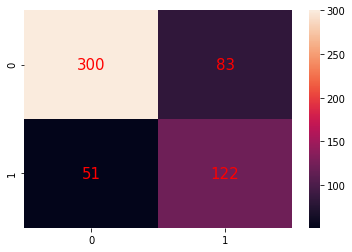

confusion_matrix Signal:



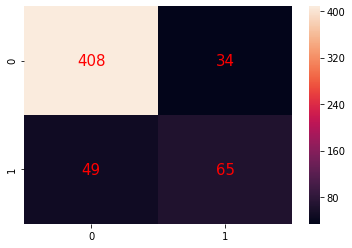

confusion_matrix Turn:



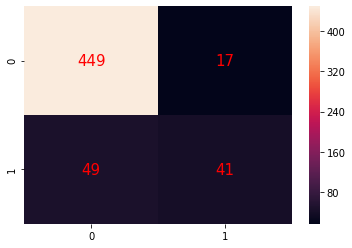

confusion_matrix Bus-Stop
:


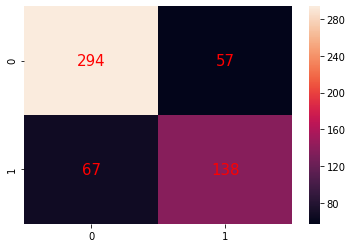

confusion_matrix Congestion
:


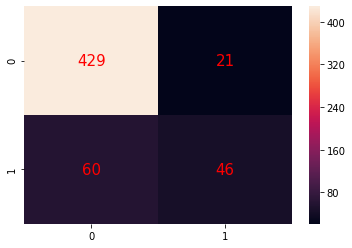

In [19]:
pred=sess.run(y_pred_class,feed_dict={X:X_test,mode:False})
print("confusion_matrix Norm:\n")
_=sns.heatmap(confusion_matrix(y_test[:,0],pred[:,0]),annot=True,fmt='d',annot_kws={"size":15,'color':'r'})
plt.show()
print("confusion_matrix Signal:\n")
_=sns.heatmap(confusion_matrix(y_test[:,1],pred[:,1]),annot=True,fmt='d',annot_kws={"size":15,'color':'r'})
plt.show()
print("confusion_matrix Turn:\n")
_=sns.heatmap(confusion_matrix(y_test[:,2],pred[:,2]),annot=True,fmt='d',annot_kws={"size":15,'color':'r'})
plt.show()
print("confusion_matrix Bus-Stop\n:")
_=sns.heatmap(confusion_matrix(y_test[:,3],pred[:,3]),annot=True,fmt='d',annot_kws={"size":15,'color':'r'})
plt.show()
print("confusion_matrix Congestion\n:")
_=sns.heatmap(confusion_matrix(y_test[:,4],pred[:,4]),annot=True,fmt='d',annot_kws={"size":15,'color':'r'})
plt.show()

In [20]:
#NICE

# TIMELEVEL 1

In [21]:
df=pd.read_csv("features_embedded.csv")

df['norm_road']=df[['Signal', 'bus_stop', 'Turn','Congestion']].apply(lambda e: 1 if e[0]==e[1]==e[2]==e[3]==0 else 0,axis=1)

In [22]:
y_test=df[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
X_test=df[['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']].values

In [23]:
ind=['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']


In [24]:
ind_y=['norm_road','Signal', 'bus_stop', 'Turn','Congestion']

In [25]:
X_test_temp=pd.DataFrame(X_test,columns=ind)

In [26]:
Y_test_temp=pd.DataFrame(y_test,columns=ind_y)

In [27]:
X_test_temp=pd.concat([Y_test_temp,X_test_temp],axis=1)

In [28]:
X_test_temp=X_test_temp[X_test_temp.time_level_1==1]

In [29]:
X_test_temp.shape

(200, 22)

In [30]:
#idex=['time_level_1','time_level_2','time_level_3','time_level_4']

In [31]:
#X_test_temp=X_test_temp.drop(columns=idex)

In [32]:
Y_test=X_test_temp[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
features=X_test_temp.drop(columns=['norm_road','Signal', 'bus_stop', 'Turn','Congestion'])

In [33]:
x_test=X_test_temp[ind].values

In [34]:
x_test=s.transform(x_test)

## TESTING

In [42]:
print("Overall acc:",sess.run(accuracy,feed_dict={X:x_test,Y:Y_test,mode:False}))
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})

print("Normal Road acc:",(pred[:,0]==Y_test[:,0]).mean())

print("Signal acc:",(pred[:,1]==Y_test[:,1]).mean())

print("Turn acc:",(pred[:,2]==Y_test[:,2]).mean())

print("Bus stop acc:",(pred[:,3]==Y_test[:,3]).mean())

print("Congestion acc:",(pred[:,4]==Y_test[:,4]).mean())

Overall acc: 0.739
Normal Road acc: 0.845
Signal acc: 0.9
Turn acc: 0.54
Bus stop acc: 0.485
Congestion acc: 0.925


## ANALYSIS

In [43]:
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})
print("classification report Norm:\n",classification_report(Y_test[:,0],pred[:,0]))
print("classification report Signal:\n",classification_report(Y_test[:,1],pred[:,1]))
print("classification report Turn:\n",classification_report(Y_test[:,2],pred[:,2]))
print("classification report Bus-Stop\n:",classification_report(Y_test[:,3],pred[:,3]))
print("classification report Congestion\n:",classification_report(Y_test[:,4],pred[:,4]))

classification report Norm:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       131
           1       0.81      0.72      0.76        69

    accuracy                           0.84       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.84      0.84      0.84       200

classification report Signal:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       164
           1       0.83      0.56      0.67        36

    accuracy                           0.90       200
   macro avg       0.87      0.77      0.80       200
weighted avg       0.90      0.90      0.89       200

classification report Turn:
               precision    recall  f1-score   support

           0       0.58      0.86      0.69       121
           1       0.19      0.05      0.08        79

    accuracy                           0.54       200
   macro avg       0.39      0.46      

# TIMELEVEL 2

In [44]:
df=pd.read_csv("features_embedded.csv")

df['norm_road']=df[['Signal', 'bus_stop', 'Turn','Congestion']].apply(lambda e: 1 if e[0]==e[1]==e[2]==e[3]==0 else 0,axis=1)

In [45]:
y_test=df[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
X_test=df[['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']].values

In [46]:
ind=['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']


In [47]:
ind_y=['norm_road','Signal', 'bus_stop', 'Turn','Congestion']

In [48]:
X_test_temp=pd.DataFrame(X_test,columns=ind)

In [49]:
Y_test_temp=pd.DataFrame(y_test,columns=ind_y)

In [50]:
X_test_temp=pd.concat([Y_test_temp,X_test_temp],axis=1)

In [51]:
X_test_temp=X_test_temp[X_test_temp.time_level_2==1]

In [52]:
X_test_temp.shape

(323, 22)

In [53]:
Y_test=X_test_temp[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
features=X_test_temp.drop(columns=['norm_road','Signal', 'bus_stop', 'Turn','Congestion'])

In [54]:
x_test=X_test_temp[ind].values

In [55]:
x_test=s.transform(x_test)

## TESTING

In [56]:
print("Overall acc:",sess.run(accuracy,feed_dict={X:x_test,Y:Y_test,mode:False}))
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})

print("Normal Road acc:",(pred[:,0]==Y_test[:,0]).mean())

print("Signal acc:",(pred[:,1]==Y_test[:,1]).mean())

print("Turn acc:",(pred[:,2]==Y_test[:,2]).mean())

print("Bus stop acc:",(pred[:,3]==Y_test[:,3]).mean())

print("Congestion acc:",(pred[:,4]==Y_test[:,4]).mean())


Overall acc: 0.7529412
Normal Road acc: 0.8173374613003096
Signal acc: 0.8947368421052632
Turn acc: 0.5572755417956656
Bus stop acc: 0.5975232198142415
Congestion acc: 0.8978328173374613


## ANALYSIS

In [57]:
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})
print("classification report Norm:\n",classification_report(Y_test[:,0],pred[:,0]))
print("classification report Signal:\n",classification_report(Y_test[:,1],pred[:,1]))
print("classification report Turn:\n",classification_report(Y_test[:,2],pred[:,2]))
print("classification report Bus-Stop\n:",classification_report(Y_test[:,3],pred[:,3]))
print("classification report Congestion\n:",classification_report(Y_test[:,4],pred[:,4]))

classification report Norm:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       216
           1       0.67      0.87      0.76       107

    accuracy                           0.82       323
   macro avg       0.80      0.83      0.81       323
weighted avg       0.84      0.82      0.82       323

classification report Signal:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       259
           1       0.73      0.75      0.74        64

    accuracy                           0.89       323
   macro avg       0.83      0.84      0.84       323
weighted avg       0.90      0.89      0.90       323

classification report Turn:
               precision    recall  f1-score   support

           0       0.60      0.88      0.71       199
           1       0.17      0.04      0.07       124

    accuracy                           0.56       323
   macro avg       0.38      0.46      

# TIMELEVEL 3

In [58]:
df=pd.read_csv("features_embedded.csv")

df['norm_road']=df[['Signal', 'bus_stop', 'Turn','Congestion']].apply(lambda e: 1 if e[0]==e[1]==e[2]==e[3]==0 else 0,axis=1)

In [59]:
y_test=df[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
X_test=df[['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']].values

In [60]:
ind=['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']


In [61]:
ind_y=['norm_road','Signal', 'bus_stop', 'Turn','Congestion']

In [62]:
X_test_temp=pd.DataFrame(X_test,columns=ind)

In [63]:
Y_test_temp=pd.DataFrame(y_test,columns=ind_y)

In [64]:
X_test_temp=pd.concat([Y_test_temp,X_test_temp],axis=1)

In [65]:
X_test_temp=X_test_temp[X_test_temp.time_level_3==1]

In [66]:
X_test_temp.shape

(195, 22)

In [67]:
Y_test=X_test_temp[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
features=X_test_temp.drop(columns=['norm_road','Signal', 'bus_stop', 'Turn','Congestion'])

In [68]:
x_test=X_test_temp[ind].values

In [69]:
x_test=s.transform(x_test)

## TESTING

In [70]:
print("Overall acc:",sess.run(accuracy,feed_dict={X:x_test,Y:Y_test,mode:False}))
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})

print("Normal Road acc:",(pred[:,0]==Y_test[:,0]).mean())

print("Signal acc:",(pred[:,1]==Y_test[:,1]).mean())

print("Turn acc:",(pred[:,2]==Y_test[:,2]).mean())

print("Bus stop acc:",(pred[:,3]==Y_test[:,3]).mean())

print("Congestion acc:",(pred[:,4]==Y_test[:,4]).mean())



Overall acc: 0.7692308
Normal Road acc: 0.8666666666666667
Signal acc: 0.9487179487179487
Turn acc: 0.5282051282051282
Bus stop acc: 0.5435897435897435
Congestion acc: 0.958974358974359


## ANALYSIS

In [71]:
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})
print("classification report Norm:\n",classification_report(Y_test[:,0],pred[:,0]))
print("classification report Signal:\n",classification_report(Y_test[:,1],pred[:,1]))
print("classification report Turn:\n",classification_report(Y_test[:,2],pred[:,2]))
print("classification report Bus-Stop\n:",classification_report(Y_test[:,3],pred[:,3]))
print("classification report Congestion\n:",classification_report(Y_test[:,4],pred[:,4]))

classification report Norm:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       128
           1       0.76      0.90      0.82        67

    accuracy                           0.87       195
   macro avg       0.85      0.87      0.86       195
weighted avg       0.88      0.87      0.87       195

classification report Signal:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       155
           1       1.00      0.75      0.86        40

    accuracy                           0.95       195
   macro avg       0.97      0.88      0.91       195
weighted avg       0.95      0.95      0.95       195

classification report Turn:
               precision    recall  f1-score   support

           0       0.59      0.82      0.69       123
           1       0.08      0.03      0.04        72

    accuracy                           0.53       195
   macro avg       0.34      0.42      

# TIMELEVEL 4

In [72]:
df=pd.read_csv("features_embedded.csv")

df['norm_road']=df[['Signal', 'bus_stop', 'Turn','Congestion']].apply(lambda e: 1 if e[0]==e[1]==e[2]==e[3]==0 else 0,axis=1)

In [73]:
y_test=df[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
X_test=df[['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']].values

In [74]:
ind=['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']


In [75]:
ind_y=['norm_road','Signal', 'bus_stop', 'Turn','Congestion']

In [76]:
X_test_temp=pd.DataFrame(X_test,columns=ind)

In [77]:
Y_test_temp=pd.DataFrame(y_test,columns=ind_y)

In [78]:
X_test_temp=pd.concat([Y_test_temp,X_test_temp],axis=1)

In [79]:
X_test_temp=X_test_temp[X_test_temp.time_level_4==1]

In [80]:
X_test_temp.shape

(964, 22)

In [81]:
Y_test=X_test_temp[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
features=X_test_temp.drop(columns=['norm_road','Signal', 'bus_stop', 'Turn','Congestion'])

In [82]:
x_test=X_test_temp[ind].values

In [83]:
x_test=s.transform(x_test)

## Testing 

In [84]:
print("Overall acc:",sess.run(accuracy,feed_dict={X:x_test,Y:Y_test,mode:False}))
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})

print("Normal Road acc:",(pred[:,0]==Y_test[:,0]).mean())

print("Signal acc:",(pred[:,1]==Y_test[:,1]).mean())

print("Turn acc:",(pred[:,2]==Y_test[:,2]).mean())

print("Bus stop acc:",(pred[:,3]==Y_test[:,3]).mean())




Overall acc: 0.7813278
Normal Road acc: 0.8931535269709544
Signal acc: 0.9336099585062241
Turn acc: 0.58298755186722
Bus stop acc: 0.5819502074688797


## ANALYSIS

In [85]:
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})
print("classification report Norm:\n",classification_report(Y_test[:,0],pred[:,0]))
print("classification report Signal:\n",classification_report(Y_test[:,1],pred[:,1]))
print("classification report Turn:\n",classification_report(Y_test[:,2],pred[:,2]))
print("classification report Bus-Stop\n:",classification_report(Y_test[:,3],pred[:,3]))
print("classification report Congestion\n:",classification_report(Y_test[:,4],pred[:,4]))

classification report Norm:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       653
           1       0.79      0.92      0.85       311

    accuracy                           0.89       964
   macro avg       0.87      0.90      0.88       964
weighted avg       0.90      0.89      0.90       964

classification report Signal:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       764
           1       0.90      0.77      0.83       200

    accuracy                           0.93       964
   macro avg       0.92      0.87      0.89       964
weighted avg       0.93      0.93      0.93       964

classification report Turn:
               precision    recall  f1-score   support

           0       0.63      0.86      0.73       617
           1       0.26      0.09      0.13       347

    accuracy                           0.58       964
   macro avg       0.44      0.47      

# ZONE

# Zone_Class_Market

In [86]:
df=pd.read_csv("features_embedded.csv")

df['norm_road']=df[['Signal', 'bus_stop', 'Turn','Congestion']].apply(lambda e: 1 if e[0]==e[1]==e[2]==e[3]==0 else 0,axis=1)

In [87]:
y_test=df[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
X_test=df[['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']].values

In [88]:
ind=['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']


In [89]:
ind_y=['norm_road','Signal', 'bus_stop', 'Turn','Congestion']

In [90]:
X_test_temp=pd.DataFrame(X_test,columns=ind)

In [91]:
Y_test_temp=pd.DataFrame(y_test,columns=ind_y)

In [92]:
X_test_temp=pd.concat([Y_test_temp,X_test_temp],axis=1)

In [93]:
X_test_temp=X_test_temp[X_test_temp.zone_market_place==1]

In [94]:
X_test_temp.shape

(221, 22)

In [95]:
Y_test=X_test_temp[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
features=X_test_temp.drop(columns=['norm_road','Signal', 'bus_stop', 'Turn','Congestion'])

In [96]:
x_test=X_test_temp[ind].values

In [97]:
x_test=s.transform(x_test)

## TESTING 

In [98]:
print("Overall acc:",sess.run(accuracy,feed_dict={X:x_test,Y:Y_test,mode:False}))
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})

print("Normal Road acc:",(pred[:,0]==Y_test[:,0]).mean())

print("Signal acc:",(pred[:,1]==Y_test[:,1]).mean())

print("Turn acc:",(pred[:,2]==Y_test[:,2]).mean())

print("Bus stop acc:",(pred[:,3]==Y_test[:,3]).mean())

print("Congestion acc:",(pred[:,4]==Y_test[:,4]).mean())



Overall acc: 0.7565611
Normal Road acc: 0.8778280542986425
Signal acc: 1.0
Turn acc: 0.45248868778280543
Bus stop acc: 0.45248868778280543
Congestion acc: 1.0


## ANALYSIS

In [99]:
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})
print("classification report Norm:\n",classification_report(Y_test[:,0],pred[:,0]))
print("classification report Signal:\n",classification_report(Y_test[:,1],pred[:,1]))
print("classification report Turn:\n",classification_report(Y_test[:,2],pred[:,2]))
print("classification report Bus-Stop\n:",classification_report(Y_test[:,3],pred[:,3]))
print("classification report Congestion\n:",classification_report(Y_test[:,4],pred[:,4]))

classification report Norm:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       134
           1       0.81      0.90      0.85        87

    accuracy                           0.88       221
   macro avg       0.87      0.88      0.87       221
weighted avg       0.88      0.88      0.88       221

classification report Signal:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       221

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221

classification report Turn:
               precision    recall  f1-score   support

           0       0.65      0.59      0.62       167
           1       0.03      0.04      0.03        54

    accuracy                           0.45       221
   macro avg       0.34      0.31      0.33       221
weighted avg       0.50      0.45      

# ZONE_HIGHWAY

In [100]:
df=pd.read_csv("features_embedded.csv")

df['norm_road']=df[['Signal', 'bus_stop', 'Turn','Congestion']].apply(lambda e: 1 if e[0]==e[1]==e[2]==e[3]==0 else 0,axis=1)

In [101]:
y_test=df[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
X_test=df[['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']].values

In [102]:
ind=['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']


In [103]:
ind_y=['norm_road','Signal', 'bus_stop', 'Turn','Congestion']

In [104]:
X_test_temp=pd.DataFrame(X_test,columns=ind)

In [105]:
Y_test_temp=pd.DataFrame(y_test,columns=ind_y)

In [106]:
X_test_temp=pd.concat([Y_test_temp,X_test_temp],axis=1)

In [107]:
X_test_temp=X_test_temp[X_test_temp.zone_highway==1]

In [108]:
X_test_temp.shape

(382, 22)

In [109]:
Y_test=X_test_temp[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
features=X_test_temp.drop(columns=['norm_road','Signal', 'bus_stop', 'Turn','Congestion'])

In [110]:
x_test=X_test_temp[ind].values

In [111]:
x_test=s.transform(x_test)

## TESTING 

In [112]:
print("Overall acc:",sess.run(accuracy,feed_dict={X:x_test,Y:Y_test,mode:False}))
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})

print("Normal Road acc:",(pred[:,0]==Y_test[:,0]).mean())

print("Signal acc:",(pred[:,1]==Y_test[:,1]).mean())

print("Turn acc:",(pred[:,2]==Y_test[:,2]).mean())

print("Bus stop acc:",(pred[:,3]==Y_test[:,3]).mean())

print("Congestion acc:",(pred[:,4]==Y_test[:,4]).mean())


Overall acc: 0.77853405
Normal Road acc: 0.9267015706806283
Signal acc: 0.9136125654450262
Turn acc: 0.6230366492146597
Bus stop acc: 0.581151832460733
Congestion acc: 0.8481675392670157


## ANALYSIS

In [113]:
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})
print("classification report Norm:\n",classification_report(Y_test[:,0],pred[:,0]))
print("classification report Signal:\n",classification_report(Y_test[:,1],pred[:,1]))
print("classification report Turn:\n",classification_report(Y_test[:,2],pred[:,2]))
print("classification report Bus-Stop\n:",classification_report(Y_test[:,3],pred[:,3]))
print("classification report Congestion\n:",classification_report(Y_test[:,4],pred[:,4]))

classification report Norm:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       287
           1       0.83      0.88      0.86        95

    accuracy                           0.93       382
   macro avg       0.90      0.91      0.90       382
weighted avg       0.93      0.93      0.93       382

classification report Signal:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       261
           1       0.87      0.85      0.86       121

    accuracy                           0.91       382
   macro avg       0.90      0.90      0.90       382
weighted avg       0.91      0.91      0.91       382

classification report Turn:
               precision    recall  f1-score   support

           0       0.68      0.87      0.77       271
           1       0.05      0.02      0.03       111

    accuracy                           0.62       382
   macro avg       0.37      0.44      

# ZONE_NORMAL_CITY

In [118]:
df=pd.read_csv("features_embedded.csv")

df['norm_road']=df[['Signal', 'bus_stop', 'Turn','Congestion']].apply(lambda e: 1 if e[0]==e[1]==e[2]==e[3]==0 else 0,axis=1)

In [119]:
y_test=df[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
X_test=df[['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']].values

In [120]:
ind=['next_stop_distance','total_waiting_time','wifi_count','honks','rsi','zone_highway','zone_market_place','zone_normal_city','time_level_1','time_level_2','time_level_3','time_level_4','Population_density_dense','Population_density_medium','Population_density_sparse','Weekend/day_Week-day','Weekend/day_Week-end']


In [121]:
ind_y=['norm_road','Signal', 'bus_stop', 'Turn','Congestion']

In [122]:
X_test_temp=pd.DataFrame(X_test,columns=ind)

In [123]:
Y_test_temp=pd.DataFrame(y_test,columns=ind_y)

In [124]:
X_test_temp=pd.concat([Y_test_temp,X_test_temp],axis=1)

In [125]:
X_test_temp=X_test_temp[X_test_temp.zone_normal_city==1]

In [126]:
X_test_temp.shape

(1079, 22)

In [127]:
Y_test=X_test_temp[['norm_road','Signal', 'Turn','bus_stop','Congestion']].values
features=X_test_temp.drop(columns=['norm_road','Signal', 'bus_stop', 'Turn','Congestion'])

In [128]:
x_test=X_test_temp[ind].values

In [129]:
x_test=s.transform(x_test)

## TESTING 

In [130]:
print("Overall acc:",sess.run(accuracy,feed_dict={X:x_test,Y:Y_test,mode:False}))
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})

print("Normal Road acc:",(pred[:,0]==Y_test[:,0]).mean())

print("Signal acc:",(pred[:,1]==Y_test[:,1]).mean())

print("Turn acc:",(pred[:,2]==Y_test[:,2]).mean())

print("Bus stop acc:",(pred[:,3]==Y_test[:,3]).mean())

print("Congestion acc:",(pred[:,4]==Y_test[:,4]).mean())


Overall acc: 0.76886004
Normal Road acc: 0.8480074142724745
Signal acc: 0.9119555143651529
Turn acc: 0.5699721964782206
Bus stop acc: 0.5885078776645042
Congestion acc: 0.9258572752548656


##  ANALYSIS

In [131]:
pred=sess.run(y_pred_class,feed_dict={X:x_test,mode:False})
print("classification report Norm:\n",classification_report(Y_test[:,0],pred[:,0]))
print("classification report Signal:\n",classification_report(Y_test[:,1],pred[:,1]))
print("classification report Turn:\n",classification_report(Y_test[:,2],pred[:,2]))
print("classification report Bus-Stop\n:",classification_report(Y_test[:,3],pred[:,3]))
print("classification report Congestion\n:",classification_report(Y_test[:,4],pred[:,4]))

classification report Norm:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       707
           1       0.73      0.88      0.80       372

    accuracy                           0.85      1079
   macro avg       0.83      0.85      0.84      1079
weighted avg       0.86      0.85      0.85      1079

classification report Signal:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       860
           1       0.86      0.68      0.76       219

    accuracy                           0.91      1079
   macro avg       0.89      0.83      0.85      1079
weighted avg       0.91      0.91      0.91      1079

classification report Turn:
               precision    recall  f1-score   support

           0       0.58      0.93      0.71       622
           1       0.46      0.08      0.14       457

    accuracy                           0.57      1079
   macro avg       0.52      0.51      